## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

## Loading the dataset

In [2]:
data = pd.read_csv('Iris.csv')
data = data.drop('Id', axis=1)
data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
87,6.3,2.3,4.4,1.3,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica
2,4.7,3.2,1.3,0.2,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


### Split Data into features (X) and labels (y)

In [3]:
X = data.iloc[:,0:4]
y = data.iloc[:,-1]
print(X.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
62             6.0           2.2            4.0           1.0
134            6.1           2.6            5.6           1.4
71             6.1           2.8            4.0           1.3
5              5.4           3.9            1.7           0.4
13             4.3           3.0            1.1           0.1
122     Iris-virginica
4          Iris-setosa
58     Iris-versicolor
114     Iris-virginica
117     Iris-virginica
Name: Species, dtype: object


## Visualizing the Data

### Examples per species 

In [4]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Scatter Plot showing Species Distribution using SepalLength 

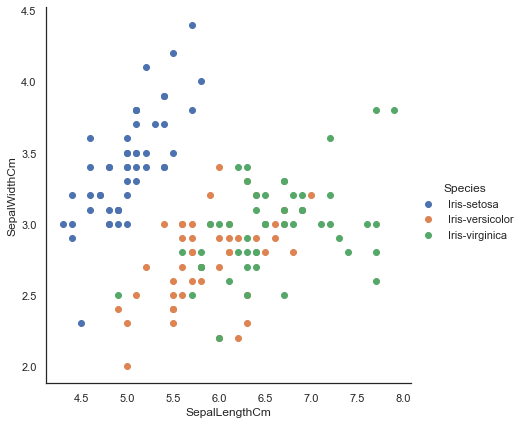

In [5]:
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend();

### Scatter Plot showing Species Distribution using PetalLength 

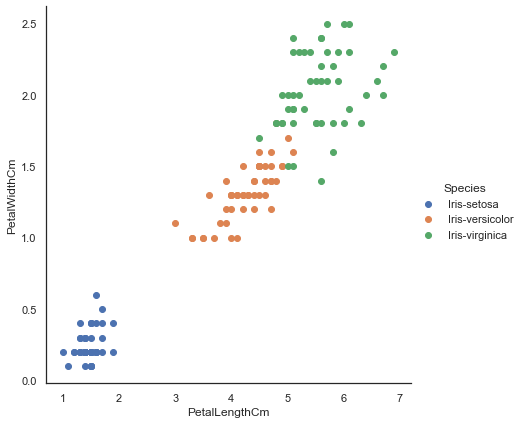

In [6]:
# do same for petals
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend();

It is to be observed that species are more linearly separable with petal size, as compared to sepal sizes. However, in the Petal Length distribution, versicolor and virginica look very similar, and might confuse the clustering algorithm.

### Scatter Matrix showing each Pair of Features in the Data

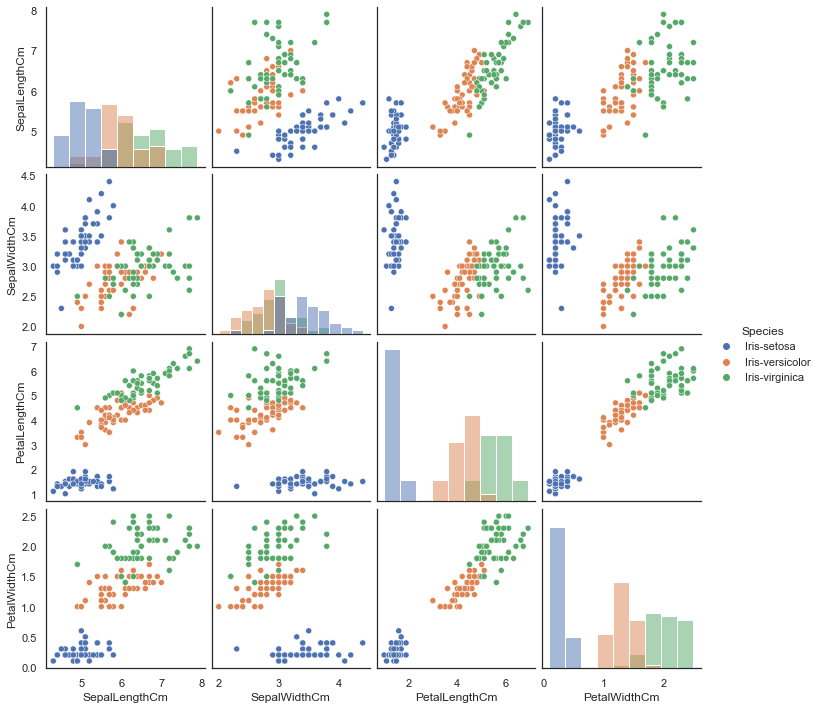

In [7]:
sns.pairplot(data, hue="Species", diag_kind="hist", size=2.5);

Again, this shows how similar versicolor and virginica are with all the given features.

## Feature Scaling

Since the data is very much unbalanced, feature scaling is important such that the large features do not dominate the other features in the clusters.

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
130,1.886180,-0.587764,1.331416,0.922064
64,-0.294842,-0.356361,-0.090227,0.133226
135,2.249683,-0.124958,1.331416,1.447956
48,-0.658345,1.494863,-1.284407,-1.312977
117,2.249683,1.726266,1.672610,1.316483


## K-Means Clustering

In [9]:
from sklearn.cluster import KMeans

nclusters = 3
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

### Predicting the clusters using K-Means

In [10]:
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Calculating the Silhouette Score for the K-Means Clustering Model

In [11]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, y_cluster_kmeans)
print("Silhouette Score for K-Means Clustering Model:", score)

Silhouette Score for K-Means Clustering Model: 0.4589717867018717


### Visualizing the distribution of silhouette Scores

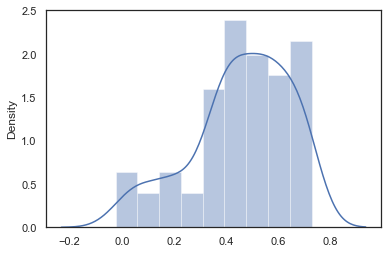

In [12]:
from sklearn.metrics import silhouette_samples
scores = silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores);

### Plotting Specices Data w.r.t Silhouette Scores

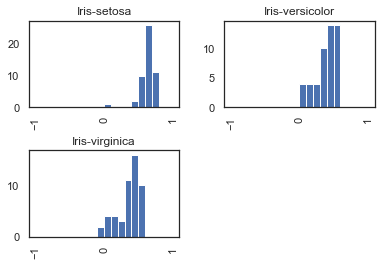

In [13]:
df_scores = pd.DataFrame()
df_scores['SilhouetteScore'] = scores
df_scores['Species'] = data['Species']
df_scores.hist(by='Species', column='SilhouetteScore', range=(-1,1), bins=20);

As expected, Versicolor and Virginica have lower silhouette scores than Setosas, since they are both closer together.

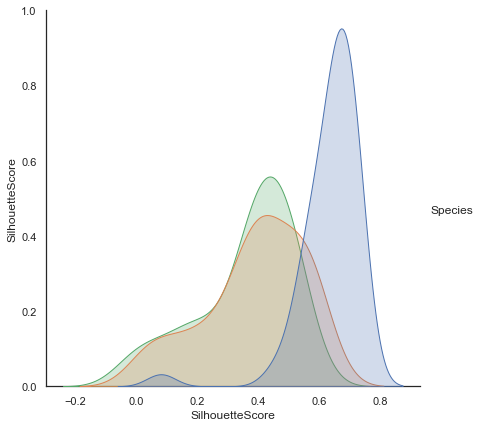

In [14]:
sns.pairplot(df_scores, hue="Species", size=6);

Clearly, the Setosas (blue species) have higher silhouette scores.

## Principal Component Analysis (PCA)

### Reducing the data from 4D to 2D using PCA

In [15]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(X_scaled)
X_pca_array = pca.transform(X_scaled)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2']) # PC=principal component
X_pca.sample(5)

,PC1,PC2
34,-2.188676,-0.448629
105,2.754197,0.788432
141,1.903117,0.686025
35,-2.211120,-0.184338
134,1.197469,-0.817168


### Converting Species to Arbitrary Numbers

In [16]:
y_id_array = data['Species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

df_plot = X_pca.copy()
df_plot['ClusterKmeans'] = y_cluster_kmeans
df_plot['SpeciesId'] = y_id_array
df_plot.sample(5)

,PC1,PC2,ClusterKmeans,SpeciesId
56,0.748715,0.778699,0,1
129,1.864778,0.555382,0,2
57,-0.497863,-1.848869,2,1
31,-1.831938,0.445267,1,0
8,-2.341958,-1.095146,1,0


### Function to create a 2D scatterplot of the clusters

In [17]:
def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = mpl.cm.get_cmap('prism')

    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax,
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(nclusters-1)),
                     label = "%s %i" % (groupby, i), 
                     s=30)
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");

### Plotting the Predicted Labels

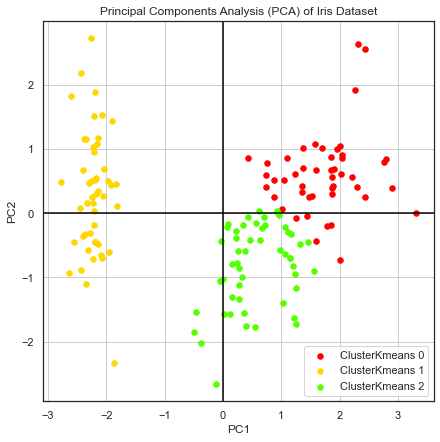

In [18]:
plotData(df_plot, 'ClusterKmeans')

### Plotting the Original Labels

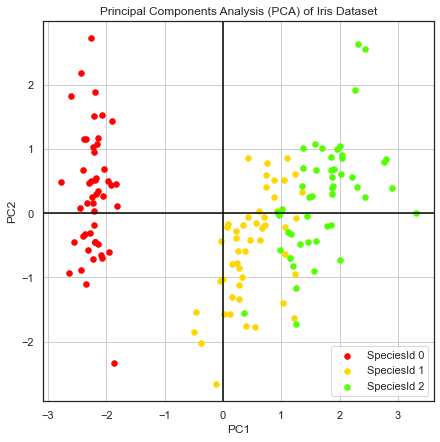

In [19]:
plotData(df_plot, 'SpeciesId')

This means that K-Means **did not** find the correct clusters.

## Gaussian Mixture Model (GMM) Clustering

In [20]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)

GaussianMixture(n_components=3)

### Predicting clusters using GMM

In [21]:
y_cluster_gmm = gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

### Plotting the GMM Clusters

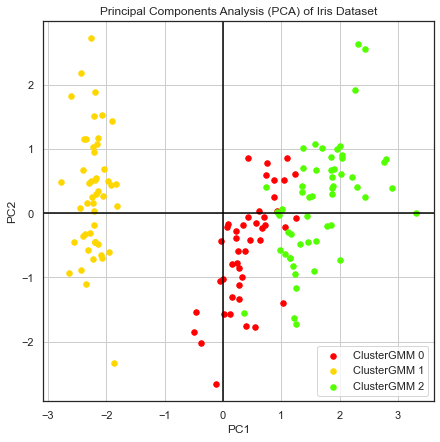

In [22]:
# Adding the GMM clusters to data table
df_plot['ClusterGMM'] = y_cluster_gmm
plotData(df_plot, 'ClusterGMM')

## Comparing K-Means and GMM clustering

### Adjusted Rand Index Score for K-Means Model

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score, davies_bouldin_score
adj_score = adjusted_rand_score(y, y_cluster_kmeans)
print("Adjusted Rand Score for K-Means:", adj_score)

Adjusted Rand Score for K-Means: 0.6201351808870379


### Adjusted Rand Index Score for GMM

In [24]:
adj_score = adjusted_rand_score(y, y_cluster_gmm)
print("Adjusted Rand Score for GMM:", adj_score)

Adjusted Rand Score for GMM: 0.9038742317748124


Clearly, the **Gaussian Mixture Model matches the true labels more closely** than the **K-Means Model**